## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import davies_bouldin_score

In [2]:
file=pd.read_csv('../data/merged_data.csv')

In [3]:
file.drop(columns=['Unnamed: 0',"FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1,inplace=True)

In [4]:
file.head()

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,covid_cases,covid_deaths,internet_percent,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
0,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,7.2,34.7,69.130124,...,1.000,17.0,21.054,0.750,1241,23,75.0,32.7,388.7,179.6
1,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,8.0,26.5,73.713549,...,9.000,80.0,76.133,0.920,3776,32,92.0,30.1,362.6,143.4
2,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,5.6,23.5,53.166770,...,1.000,6.0,9.191,0.540,646,6,54.0,41.2,444.3,217.2
3,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,7.8,33.5,16.251364,...,0.698,4.0,6.916,0.698,464,6,69.8,37.4,491.8,143.3
4,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,8.4,30.3,15.634486,...,1.000,14.0,20.690,0.620,967,5,62.0,32.5,437.9,112.4


In [5]:
file.shape

(3100, 81)

### Column details

In [6]:
file.describe()

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,covid_cases,covid_deaths,internet_percent,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,...,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,1200.589677,7827.091920,17.941393,3.991602,4.170133,7.921836,17.482486,7.429032,27.388065,62.925927,...,2.746771,32.278817,37.524221,0.699828,1600.755806,50.353226,69.982839,33.483290,357.333387,255.347774
std,3133.798963,3436.128384,4.728566,0.702353,0.601551,2.414836,3.569744,1.256604,5.705178,23.252200,...,9.712527,104.880206,112.298573,0.172544,6929.971719,268.364932,17.254354,5.903441,85.357226,108.623032
min,0.000000,0.000000,8.120645,2.449054,2.532818,0.000000,5.908719,0.000000,9.500000,0.000000,...,0.000000,0.000000,0.152000,0.110000,1.000000,0.000000,11.000000,11.000000,-1.000000,-1.000000
25%,178.000000,6291.289478,14.330513,3.475977,3.754056,6.692913,14.976697,6.900000,23.600000,48.576080,...,0.000000,3.000000,4.337500,0.610000,64.000000,1.000000,61.000000,29.700000,298.275000,181.300000
50%,409.000000,8003.773251,17.230312,3.936494,4.175720,7.762506,16.982250,7.700000,27.200000,65.996779,...,1.000000,7.000000,9.948000,0.698000,230.000000,4.000000,69.800000,33.700000,345.000000,236.000000
75%,976.500000,9927.314540,20.925938,4.441717,4.577316,9.041310,19.756380,8.200000,31.100000,80.155007,...,2.000000,20.000000,25.928250,0.780000,793.000000,18.000000,78.000000,37.325000,403.800000,302.925000
max,84296.000000,29138.378057,40.990687,6.552513,6.313753,24.390244,41.491309,10.000000,49.900000,100.000000,...,305.000000,3054.000000,3295.198000,3.330000,214197.000000,5973.000000,333.000000,58.900000,970.800000,1136.300000


In [7]:
# Checking for presence of null values in any column

for val in file.isnull().any():
    if val==True:
        print("The column",val,'has null values')
    else:
        pass
print("No null values found for any column")    

No null values found for any column


In [8]:
file

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,covid_cases,covid_deaths,internet_percent,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
0,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,7.2,34.7,69.130124,...,1.000,17.0,21.054,0.750,1241,23,75.0,32.7,388.7,179.6
1,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,8.0,26.5,73.713549,...,9.000,80.0,76.133,0.920,3776,32,92.0,30.1,362.6,143.4
2,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,5.6,23.5,53.166770,...,1.000,6.0,9.191,0.540,646,6,54.0,41.2,444.3,217.2
3,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,7.8,33.5,16.251364,...,0.698,4.0,6.916,0.698,464,6,69.8,37.4,491.8,143.3
4,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,8.4,30.3,15.634486,...,1.000,14.0,20.690,0.620,967,5,62.0,32.5,437.9,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,14.813082,3.402029,3.623554,9.705248,18.073422,7.7,25.0,89.686344,...,1.000,14.0,16.269,0.780,266,2,78.0,30.1,352.6,246.9
3096,109.0,2730.603992,11.914358,3.031233,3.180613,7.736721,14.546369,8.2,11.6,99.718230,...,2.000,11.0,8.795,1.090,373,1,109.0,11.0,157.7,55.3
3097,256.0,7330.683549,15.537464,3.628488,3.669805,10.110206,17.212675,7.4,27.2,84.018373,...,1.000,7.0,7.705,0.820,278,2,82.0,34.9,333.9,190.5
3098,110.0,6586.049959,15.955971,3.613308,3.682514,7.028754,16.859400,8.3,28.2,83.182937,...,0.000,3.0,3.490,0.760,81,5,76.0,29.5,305.7,235.8


In [9]:
X=file

In [10]:
#listing all the columns with type str
for val in X.columns:
    if type(X[val][0])==str:
        print(val)

# Variance threshold to drop low variance data

In [11]:
def Drop(l1, l2): 
    dif = [i for i in l1  if i not in l2] 
    return dif 

In [12]:
feature_drop={}

for th in range(0,50,5):
    thresh = VarianceThreshold(threshold=th)
    thresh.fit(X)
    dropped_list=Drop(X.columns.tolist(),X.columns[thresh.get_support()].tolist())
    feature_drop[th]=(dropped_list,len(dropped_list))
    print("For threshold of {} the number of features dropped are {}".format(th,len(dropped_list)))
         

For threshold of 0 the number of features dropped are 0
For threshold of 5 the number of features dropped are 11
For threshold of 10 the number of features dropped are 16
For threshold of 15 the number of features dropped are 21
For threshold of 20 the number of features dropped are 25
For threshold of 25 the number of features dropped are 28
For threshold of 30 the number of features dropped are 28
For threshold of 35 the number of features dropped are 32
For threshold of 40 the number of features dropped are 33
For threshold of 45 the number of features dropped are 33


###  [       { " Threshold Value" :  (  [ 'Dropped features']  ,  'number of dropped features')  }  , ..........  ]

In [13]:
feature_drop

{0: ([], 0),
 5: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   'Food Environment Index',
   '% Unemployed',
   'Income Ratio',
   'Average Daily PM2.5',
   '% Frequent Mental Distress',
   'Average Reading Performance',
   'Average Math Performance',
   '% Native Hawaiian/Other Pacific Islander',
   'internet_ratio'],
  11),
 10: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   '% Low Birthweight',
   'Food Environment Index',
   '% Excessive Drinking',
   '% Unemployed',
   'Income Ratio',
   'Average Daily PM2.5',
   '% Frequent Mental Distress',
   'Average Reading Performance',
   'Average Math Performance',
   '% Asian',
   '% Native Hawaiian/Other Pacific Islander',
   '% Not Proficient in English',
   '% Female',
   'internet_ratio'],
  16),
 15: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   '% Low Birthweight',
   '% Smok

In [14]:
thresh.variances_

array([9.81752797e+06, 1.18031696e+07, 2.23521190e+01, 4.93140757e-01,
       3.61746702e-01, 5.82955103e+00, 1.27389639e+01, 1.57854422e+00,
       3.25385543e+01, 5.40490408e+02, 9.96084270e+00, 2.24464884e+02,
       8.33615105e+04, 2.28389018e+02, 1.31210329e+03, 1.01679924e+03,
       6.53430530e+01, 1.00932083e+02, 2.58309001e+02, 1.38778843e+02,
       2.06101412e+00, 7.85494373e+01, 5.83567740e-01, 1.11376802e+02,
       3.38933834e+01, 3.84809843e+04, 8.09102237e+02, 4.51885513e+00,
       1.93504949e+01, 5.50742708e+01, 1.55883402e+02, 1.07951350e+02,
       1.48018318e+04, 1.24457453e+03, 1.32472043e+01, 3.87718219e+00,
       1.64056358e+01, 3.73417341e+04, 1.56401529e+01, 6.35460870e+01,
       2.12064671e+02, 1.14946919e+02, 1.72587016e+01, 3.87886278e+01,
       1.29648490e+01, 3.25479284e+01, 1.51430738e+00, 1.56489253e+00,
       1.93569630e+08, 4.40253718e+02, 6.33250530e+02, 2.41228904e+02,
       2.02944253e+01, 1.02776089e+02, 8.38829990e+01, 3.86501676e+02,
      

In [15]:
thresh.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True])

In [16]:
thresh.variances_

array([9.81752797e+06, 1.18031696e+07, 2.23521190e+01, 4.93140757e-01,
       3.61746702e-01, 5.82955103e+00, 1.27389639e+01, 1.57854422e+00,
       3.25385543e+01, 5.40490408e+02, 9.96084270e+00, 2.24464884e+02,
       8.33615105e+04, 2.28389018e+02, 1.31210329e+03, 1.01679924e+03,
       6.53430530e+01, 1.00932083e+02, 2.58309001e+02, 1.38778843e+02,
       2.06101412e+00, 7.85494373e+01, 5.83567740e-01, 1.11376802e+02,
       3.38933834e+01, 3.84809843e+04, 8.09102237e+02, 4.51885513e+00,
       1.93504949e+01, 5.50742708e+01, 1.55883402e+02, 1.07951350e+02,
       1.48018318e+04, 1.24457453e+03, 1.32472043e+01, 3.87718219e+00,
       1.64056358e+01, 3.73417341e+04, 1.56401529e+01, 6.35460870e+01,
       2.12064671e+02, 1.14946919e+02, 1.72587016e+01, 3.87886278e+01,
       1.29648490e+01, 3.25479284e+01, 1.51430738e+00, 1.56489253e+00,
       1.93569630e+08, 4.40253718e+02, 6.33250530e+02, 2.41228904e+02,
       2.02944253e+01, 1.02776089e+02, 8.38829990e+01, 3.86501676e+02,
      

# Correlation Matrix

In [17]:
X

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,covid_cases,covid_deaths,internet_percent,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
0,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,7.2,34.7,69.130124,...,1.000,17.0,21.054,0.750,1241,23,75.0,32.7,388.7,179.6
1,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,8.0,26.5,73.713549,...,9.000,80.0,76.133,0.920,3776,32,92.0,30.1,362.6,143.4
2,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,5.6,23.5,53.166770,...,1.000,6.0,9.191,0.540,646,6,54.0,41.2,444.3,217.2
3,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,7.8,33.5,16.251364,...,0.698,4.0,6.916,0.698,464,6,69.8,37.4,491.8,143.3
4,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,8.4,30.3,15.634486,...,1.000,14.0,20.690,0.620,967,5,62.0,32.5,437.9,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,14.813082,3.402029,3.623554,9.705248,18.073422,7.7,25.0,89.686344,...,1.000,14.0,16.269,0.780,266,2,78.0,30.1,352.6,246.9
3096,109.0,2730.603992,11.914358,3.031233,3.180613,7.736721,14.546369,8.2,11.6,99.718230,...,2.000,11.0,8.795,1.090,373,1,109.0,11.0,157.7,55.3
3097,256.0,7330.683549,15.537464,3.628488,3.669805,10.110206,17.212675,7.4,27.2,84.018373,...,1.000,7.0,7.705,0.820,278,2,82.0,34.9,333.9,190.5
3098,110.0,6586.049959,15.955971,3.613308,3.682514,7.028754,16.859400,8.3,28.2,83.182937,...,0.000,3.0,3.490,0.760,81,5,76.0,29.5,305.7,235.8


In [18]:
Correlation_Matrix=X.corr().abs()
Correlation_Matrix

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,covid_cases,covid_deaths,internet_percent,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
Deaths,1.000000,0.022367,0.049483,0.066521,0.032313,0.063605,0.138168,0.075667,0.189341,0.305419,...,0.914794,0.952781,0.979000,0.198775,0.904834,0.740413,0.198775,0.169474,0.099079,0.031028
Years of Potential Life Lost Rate,0.022367,1.000000,0.583520,0.637608,0.628542,0.541161,0.649359,0.276374,0.415191,0.155315,...,0.086187,0.083585,0.074468,0.310026,0.056211,0.059026,0.310026,0.427243,0.574644,0.311591
% Fair or Poor Health,0.049483,0.583520,1.000000,0.890458,0.781139,0.551200,0.728031,0.513439,0.540873,0.342258,...,0.091456,0.099054,0.090287,0.441647,0.009529,0.026192,0.441647,0.403088,0.598842,0.363663
Average Number of Physically Unhealthy Days,0.066521,0.637608,0.890458,1.000000,0.934640,0.504160,0.812055,0.474449,0.498530,0.296987,...,0.117390,0.121110,0.113693,0.380646,0.063501,0.069149,0.380646,0.381975,0.609864,0.283048
Average Number of Mentally Unhealthy Days,0.032313,0.628542,0.781139,0.934640,1.000000,0.498068,0.759548,0.388375,0.466300,0.238491,...,0.096316,0.094150,0.086478,0.312583,0.058842,0.057942,0.312583,0.346416,0.611630,0.264333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covid_deaths,0.740413,0.059026,0.026192,0.069149,0.057942,0.038151,0.134170,0.080636,0.109085,0.212636,...,0.729130,0.714698,0.763057,0.117316,0.800940,1.000000,0.117316,0.161559,0.069496,0.038543
internet_percent,0.198775,0.310026,0.441647,0.380646,0.312583,0.256698,0.385904,0.278482,0.445584,0.457100,...,0.208871,0.228293,0.207137,1.000000,0.146259,0.117316,1.000000,0.362930,0.442285,0.257685
% Adults with Obesity,0.169474,0.427243,0.403088,0.381975,0.346416,0.281936,0.497822,0.206982,0.546302,0.293947,...,0.216567,0.222189,0.212060,0.362930,0.161696,0.161559,0.362930,1.000000,0.427060,0.274547
Heart Disease Death Rate,0.099079,0.574644,0.598842,0.609864,0.611630,0.411014,0.589809,0.320971,0.572052,0.332676,...,0.145682,0.156796,0.145123,0.442285,0.091725,0.069496,0.442285,0.427060,1.000000,0.393590


In [19]:
# import seaborn as sn
# import matplotlib.pyplot as plt
# plt.figure(figsize=[256,256],dpi=100)
# sn.heatmap(Correlation_Matrix, annot=True)
# # plt.savefig('heatmap.png')
# plt.show()

## Simulating feature drop based on correlation matrix

In [20]:
# Select upper triangle of correlation matrix

feat_drop_corr=[]

for i in range(50,100,5):
    d={}
    coff=(i/100)
    upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than some value
    to_drop = [column for column in upper.columns if any(upper[column] > coff)]

    # Drop features 
    X_new=X.drop(to_drop, axis=1, inplace=False)
    d[coff]=X_new.shape[-1] , to_drop
    feat_drop_corr.append(d)

In [21]:
feat_drop_corr

[{0.5: (32,
   ['% Fair or Poor Health',
    'Average Number of Physically Unhealthy Days',
    'Average Number of Mentally Unhealthy Days',
    '% Low Birthweight',
    '% Smokers',
    'Food Environment Index',
    '% Physically Inactive',
    '% Excessive Drinking',
    'Teen Birth Rate',
    'Dentist Rate',
    '% Vaccinated',
    '% Some College',
    '% Unemployed',
    '% Children in Poverty',
    'Income Ratio',
    '% Single-Parent Households',
    'Injury Death Rate',
    'Age-Adjusted Death Rate',
    'Infant Mortality Rate',
    '% Frequent Mental Distress',
    '% Adults with Diabetes',
    '% Food Insecure',
    '% Limited Access to Healthy Foods',
    'Motor Vehicle Mortality Rate',
    '% Insufficient Sleep',
    '% Children Uninsured',
    'Average Math Performance',
    'Median Household Income',
    '% Enrolled in Free or Reduced Lunch',
    'non-White/White Segregation Index',
    'Homicide Rate',
    'Firearm Fatalities Rate',
    '% Homeowners',
    '% Severe Hous

###  [       { " Threshold Value" : 'number of remaining features' (  [ 'Dropped features']  ,)  }  , ..........  ]

In [22]:
X_new

,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,...,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_ratio,covid_cases,covid_deaths,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate
0,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,7.2,34.7,69.130124,...,74.308016,0.820225,51.448715,42.002162,0.750,1241,23,32.7,388.7,179.6
1,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,8.0,26.5,73.713549,...,83.111337,0.543517,51.538377,42.279099,0.920,3776,32,30.1,362.6,143.4
2,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,5.6,23.5,53.166770,...,45.641252,1.631683,47.216752,67.789635,0.540,646,6,41.2,444.3,217.2
3,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,7.8,33.5,16.251364,...,74.589286,0.268210,46.781250,68.352607,0.698,464,6,37.4,491.8,143.3
4,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,8.4,30.3,15.634486,...,86.886238,1.724520,50.726141,89.951502,0.620,967,5,32.5,437.9,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,14.813082,3.402029,3.623554,9.705248,18.073422,7.7,25.0,89.686344,...,79.312908,1.633221,48.544749,10.916313,0.780,266,2,30.1,352.6,246.9
3096,109.0,2730.603992,11.914358,3.031233,3.180613,7.736721,14.546369,8.2,11.6,99.718230,...,81.504268,4.314477,48.403449,46.430920,1.090,373,1,11.0,157.7,55.3
3097,256.0,7330.683549,15.537464,3.628488,3.669805,10.110206,17.212675,7.4,27.2,84.018373,...,87.398394,0.696080,49.332479,43.095937,0.820,278,2,34.9,333.9,190.5
3098,110.0,6586.049959,15.955971,3.613308,3.682514,7.028754,16.859400,8.3,28.2,83.182937,...,82.409639,0.324886,49.422955,35.954529,0.760,81,5,29.5,305.7,235.8


In [23]:
# for correlation 0.5

X_red=X.drop(feat_drop_corr[0][0.5][-1],axis=1)
X_red

,Deaths,Years of Potential Life Lost Rate,% With Access to Exercise Opportunities,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Primary Care Physicians Rate,% With Annual Mammogram,High School Graduation Rate,Social Association Rate,Violent Crime Rate,...,Suicide Rate (Age-Adjusted),Juvenile Arrest Rate,% less than 18 years of age,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Female,internet_ratio,Hypertension Death Rate
0,791.0,8128.591190,69.130124,26.785714,407.2,45.04180,41.0,90.000000,12.071202,272.282220,...,18.145295,10.625000,23.674035,0.480207,1.224798,0.111509,2.965774,51.448715,0.750,179.6
1,2967.0,7354.122530,73.713549,30.769231,325.0,72.89727,43.0,86.361577,10.205617,203.660396,...,19.377511,26.192661,21.607911,0.772399,1.150343,0.066966,4.646779,51.538377,0.920,143.4
2,472.0,10253.573403,53.166770,40.000000,716.3,31.65809,45.0,81.410256,7.518797,414.277861,...,12.836104,15.000000,20.867328,0.659137,0.454162,0.184880,4.276355,47.216752,0.540,217.2
3,471.0,11977.539484,16.251364,27.586207,339.7,48.52656,40.0,83.763838,8.381860,89.349126,...,20.858766,0.000000,20.477679,0.437500,0.236607,0.116071,2.625000,46.781250,0.698,143.3
4,1085.0,11335.071134,15.634486,19.444444,234.4,22.40877,34.0,93.468795,8.446383,482.690611,...,17.062628,7.460317,23.153527,0.653527,0.319848,0.121024,9.571231,50.726141,0.620,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,89.686344,33.962264,227.4,36.75288,37.0,80.500000,10.336748,300.494146,...,22.299100,15.961538,26.224710,1.544680,1.010429,0.157952,16.083250,48.544749,0.780,246.9
3096,109.0,2730.603992,99.718230,22.222222,348.2,116.05416,42.0,87.765957,16.333548,0.000000,...,12.095214,4.210526,18.365755,0.914172,1.412417,0.151640,14.878038,48.403449,1.090,55.3
3097,256.0,7330.683549,84.018373,20.000000,151.3,43.91315,31.0,84.687500,2.927543,71.006517,...,22.189012,8.148148,28.789596,1.418789,0.472930,0.147791,9.236908,49.332479,0.820,190.5
3098,110.0,6586.049959,83.182937,20.000000,223.2,49.60317,30.0,84.536082,16.121032,78.266105,...,0.000000,15.000000,22.739379,1.813570,0.824350,0.101458,14.051997,49.422955,0.760,235.8


In [24]:
X_red_corr=X_red.corr()
X_red_corr

,Deaths,Years of Potential Life Lost Rate,% With Access to Exercise Opportunities,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Primary Care Physicians Rate,% With Annual Mammogram,High School Graduation Rate,Social Association Rate,Violent Crime Rate,...,Suicide Rate (Age-Adjusted),Juvenile Arrest Rate,% less than 18 years of age,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Female,internet_ratio,Hypertension Death Rate
Deaths,1.000000,-0.022367,0.305419,-0.007636,0.188089,0.210986,0.027500,-0.004446,-0.146187,0.298259,...,0.007636,0.014554,0.024107,-0.051649,0.414154,0.080978,0.172574,0.151167,0.198775,-0.031028
Years of Potential Life Lost Rate,-0.022367,1.000000,-0.155315,0.014141,0.395737,-0.126006,-0.244792,0.073319,-0.130731,0.272850,...,0.389211,0.073190,0.135773,0.242203,-0.185043,-0.038199,-0.124493,0.150474,-0.310026,0.311591
% With Access to Exercise Opportunities,0.305419,-0.155315,1.000000,0.034102,0.069374,0.431781,0.188314,0.048150,-0.009062,0.154520,...,0.148168,0.225053,-0.056676,-0.043776,0.360872,0.099471,0.107219,0.113484,0.457100,-0.196725
% Driving Deaths with Alcohol Involvement,-0.007636,0.014141,0.034102,1.000000,0.008619,-0.004236,0.063936,-0.041909,-0.014933,-0.001015,...,0.039804,0.005229,-0.048410,0.125888,-0.007999,0.030256,-0.079303,-0.032362,0.080504,-0.032311
Chlamydia Rate,0.188089,0.395737,0.069374,0.008619,1.000000,0.068688,-0.104048,-0.074615,-0.108454,0.422656,...,0.110897,0.133013,0.216453,0.328940,0.113656,0.039481,0.079517,0.174083,-0.101703,0.224734
Primary Care Physicians Rate,0.210986,-0.126006,0.431781,-0.004236,0.068688,1.000000,0.224260,0.052922,0.095562,0.115094,...,0.062714,0.130889,-0.081963,-0.017868,0.296411,0.059149,-0.043066,0.190306,0.307971,-0.159077
% With Annual Mammogram,0.027500,-0.244792,0.188314,0.063936,-0.104048,0.224260,1.000000,0.028850,0.270946,-0.078668,...,-0.099167,0.079664,-0.192843,-0.253885,-0.012852,-0.064209,-0.333889,0.172644,0.217893,-0.196034
High School Graduation Rate,-0.004446,0.073319,0.048150,-0.041909,-0.074615,0.052922,0.028850,1.000000,-0.022039,-0.007439,...,0.046017,0.042463,-0.019240,-0.199645,-0.013325,-0.020023,-0.011710,0.047530,-0.016709,-0.033755
Social Association Rate,-0.146187,-0.130731,-0.009062,-0.014933,-0.108454,0.095562,0.270946,-0.022039,1.000000,-0.100655,...,-0.148592,0.093526,-0.060655,-0.117692,-0.145576,-0.084470,-0.180241,0.104209,-0.050448,0.007924
Violent Crime Rate,0.298259,0.272850,0.154520,-0.001015,0.422656,0.115094,-0.078668,-0.007439,-0.100655,1.000000,...,0.114930,0.101577,0.042193,-0.026699,0.129676,0.058831,0.151843,0.141887,-0.004248,0.133636


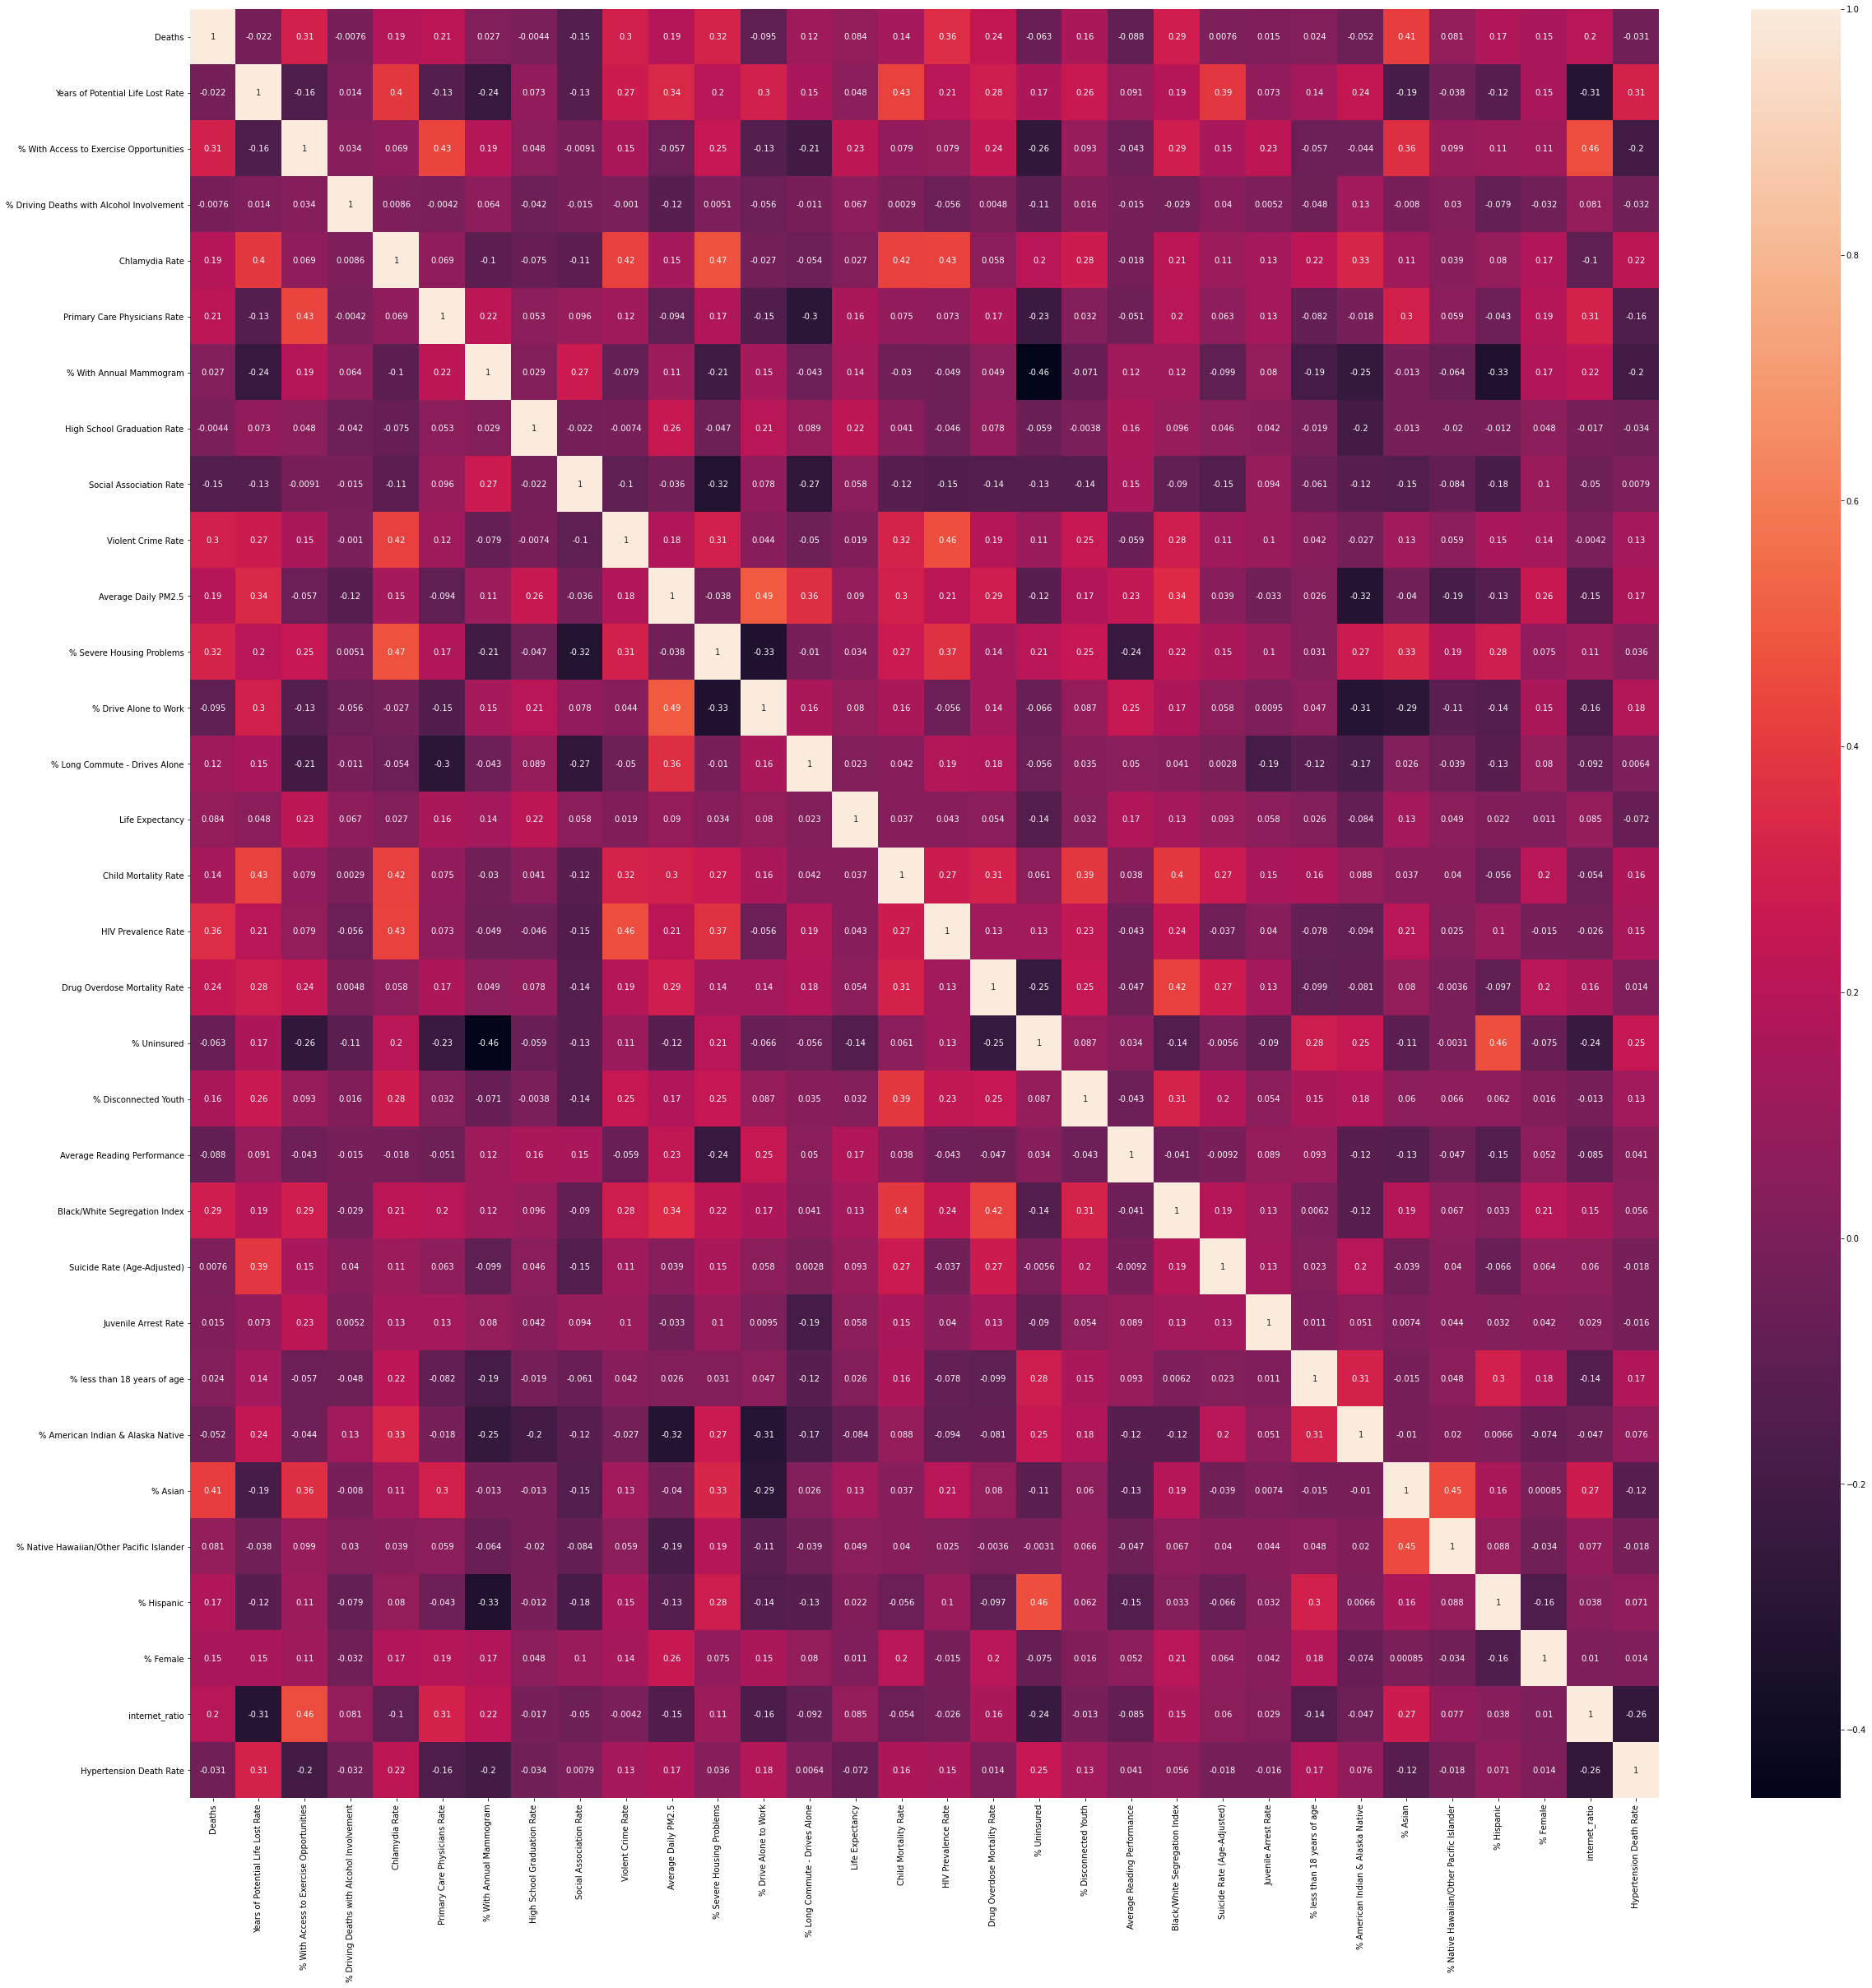

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=[40,40])
sn.heatmap(X_red_corr, annot=True)
# plt.savefig('heatmap.png')
plt.show()

# Kmeans

In [26]:
model=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )

In [27]:
model.fit(X_red)

KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

In [28]:
(model.cluster_centers_)

array([[6.54458959e+02, 1.10079991e+04, 5.33586911e+01, 2.73160851e+01,
        4.82230803e+02, 4.27682636e+01, 3.72691968e+01, 8.63020826e+01,
        1.12119917e+01, 2.88941211e+02, 9.53345102e+00, 1.43967115e+01,
        8.17835836e+01, 3.34534863e+01, 7.45524979e+01, 5.12675023e+01,
        1.71490909e+02, 1.48576684e+01, 1.57274120e+01, 5.12780270e+00,
        2.51969311e+00, 3.06244325e+01, 1.61636514e+01, 1.67838947e+01,
        2.22988345e+01, 3.64253056e+00, 7.53108762e-01, 9.47165995e-02,
        7.43474885e+00, 5.01388512e+01, 6.13442189e-01, 3.02249956e+02],
       [1.14283889e+03, 6.95397322e+03, 7.03170894e+01, 2.86783379e+01,
        3.41567346e+02, 5.93452383e+01, 4.29592593e+01, 8.82563032e+01,
        1.19175789e+01, 2.10630815e+02, 8.97228395e+00, 1.35966663e+01,
        7.98776584e+01, 3.08052469e+01, 7.89182700e+01, 3.38906676e+01,
        1.09968704e+02, 1.23847786e+01, 1.18189833e+01, 3.77037408e+00,
        2.50097028e+00, 3.30593124e+01, 1.46455550e+01, 2.01813

In [29]:
label=pd.DataFrame(model.labels_)

In [30]:
label

,0
0,1
1,1
2,0
3,0
4,0
...,...
3095,1
3096,3
3097,1
3098,1


## Using predicted labels as class column for supervised feature importance score and cluster analysis

In [31]:
X_red['class']=label

In [32]:
X_red

,Deaths,Years of Potential Life Lost Rate,% With Access to Exercise Opportunities,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Primary Care Physicians Rate,% With Annual Mammogram,High School Graduation Rate,Social Association Rate,Violent Crime Rate,...,Juvenile Arrest Rate,% less than 18 years of age,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Female,internet_ratio,Hypertension Death Rate,class
0,791.0,8128.591190,69.130124,26.785714,407.2,45.04180,41.0,90.000000,12.071202,272.282220,...,10.625000,23.674035,0.480207,1.224798,0.111509,2.965774,51.448715,0.750,179.6,1
1,2967.0,7354.122530,73.713549,30.769231,325.0,72.89727,43.0,86.361577,10.205617,203.660396,...,26.192661,21.607911,0.772399,1.150343,0.066966,4.646779,51.538377,0.920,143.4,1
2,472.0,10253.573403,53.166770,40.000000,716.3,31.65809,45.0,81.410256,7.518797,414.277861,...,15.000000,20.867328,0.659137,0.454162,0.184880,4.276355,47.216752,0.540,217.2,0
3,471.0,11977.539484,16.251364,27.586207,339.7,48.52656,40.0,83.763838,8.381860,89.349126,...,0.000000,20.477679,0.437500,0.236607,0.116071,2.625000,46.781250,0.698,143.3,0
4,1085.0,11335.071134,15.634486,19.444444,234.4,22.40877,34.0,93.468795,8.446383,482.690611,...,7.460317,23.153527,0.653527,0.319848,0.121024,9.571231,50.726141,0.620,112.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,89.686344,33.962264,227.4,36.75288,37.0,80.500000,10.336748,300.494146,...,15.961538,26.224710,1.544680,1.010429,0.157952,16.083250,48.544749,0.780,246.9,1
3096,109.0,2730.603992,99.718230,22.222222,348.2,116.05416,42.0,87.765957,16.333548,0.000000,...,4.210526,18.365755,0.914172,1.412417,0.151640,14.878038,48.403449,1.090,55.3,3
3097,256.0,7330.683549,84.018373,20.000000,151.3,43.91315,31.0,84.687500,2.927543,71.006517,...,8.148148,28.789596,1.418789,0.472930,0.147791,9.236908,49.332479,0.820,190.5,1
3098,110.0,6586.049959,83.182937,20.000000,223.2,49.60317,30.0,84.536082,16.121032,78.266105,...,15.000000,22.739379,1.813570,0.824350,0.101458,14.051997,49.422955,0.760,235.8,1


In [33]:
X_red['class'].unique()

array([1, 0, 2, 3], dtype=int32)

In [34]:
X1=X_red.drop(['class'],axis=1)

In [35]:
X1

,Deaths,Years of Potential Life Lost Rate,% With Access to Exercise Opportunities,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Primary Care Physicians Rate,% With Annual Mammogram,High School Graduation Rate,Social Association Rate,Violent Crime Rate,...,Suicide Rate (Age-Adjusted),Juvenile Arrest Rate,% less than 18 years of age,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Female,internet_ratio,Hypertension Death Rate
0,791.0,8128.591190,69.130124,26.785714,407.2,45.04180,41.0,90.000000,12.071202,272.282220,...,18.145295,10.625000,23.674035,0.480207,1.224798,0.111509,2.965774,51.448715,0.750,179.6
1,2967.0,7354.122530,73.713549,30.769231,325.0,72.89727,43.0,86.361577,10.205617,203.660396,...,19.377511,26.192661,21.607911,0.772399,1.150343,0.066966,4.646779,51.538377,0.920,143.4
2,472.0,10253.573403,53.166770,40.000000,716.3,31.65809,45.0,81.410256,7.518797,414.277861,...,12.836104,15.000000,20.867328,0.659137,0.454162,0.184880,4.276355,47.216752,0.540,217.2
3,471.0,11977.539484,16.251364,27.586207,339.7,48.52656,40.0,83.763838,8.381860,89.349126,...,20.858766,0.000000,20.477679,0.437500,0.236607,0.116071,2.625000,46.781250,0.698,143.3
4,1085.0,11335.071134,15.634486,19.444444,234.4,22.40877,34.0,93.468795,8.446383,482.690611,...,17.062628,7.460317,23.153527,0.653527,0.319848,0.121024,9.571231,50.726141,0.620,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,532.0,7831.827655,89.686344,33.962264,227.4,36.75288,37.0,80.500000,10.336748,300.494146,...,22.299100,15.961538,26.224710,1.544680,1.010429,0.157952,16.083250,48.544749,0.780,246.9
3096,109.0,2730.603992,99.718230,22.222222,348.2,116.05416,42.0,87.765957,16.333548,0.000000,...,12.095214,4.210526,18.365755,0.914172,1.412417,0.151640,14.878038,48.403449,1.090,55.3
3097,256.0,7330.683549,84.018373,20.000000,151.3,43.91315,31.0,84.687500,2.927543,71.006517,...,22.189012,8.148148,28.789596,1.418789,0.472930,0.147791,9.236908,49.332479,0.820,190.5
3098,110.0,6586.049959,83.182937,20.000000,223.2,49.60317,30.0,84.536082,16.121032,78.266105,...,0.000000,15.000000,22.739379,1.813570,0.824350,0.101458,14.051997,49.422955,0.760,235.8


In [36]:
y1=X_red['class']

### To install required package if missing

In [37]:
# !pip install xgboost

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1, y1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
print(model.feature_importances_)


[1.10656865e-01 7.75409579e-01 4.94442997e-04 1.75782549e-03
 2.30932422e-02 0.00000000e+00 3.09368479e-04 1.99106653e-04
 6.70687936e-04 1.50450913e-03 4.01878497e-03 7.79936381e-04
 3.90716217e-04 7.06235832e-03 4.53651324e-03 7.85985030e-03
 1.06598260e-02 3.06255301e-03 4.60397825e-03 4.40119952e-03
 4.47320798e-03 1.89455040e-03 3.67376662e-04 6.17772574e-04
 3.66509426e-04 1.77292451e-02 1.47531379e-03 2.94177723e-03
 0.00000000e+00 6.69788476e-03 2.38368913e-04 1.72659906e-03]


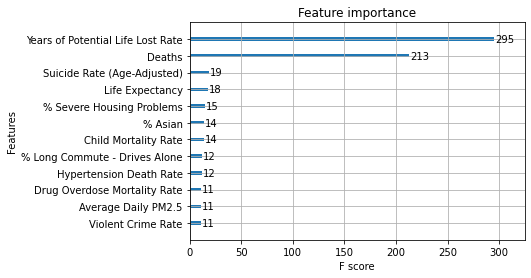

In [40]:
from xgboost import plot_importance
from matplotlib import pyplot

# No of top important features to show type=integer
top_n_features=12

plot_importance(model,max_num_features=top_n_features)
pyplot.show()

In [41]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

In [43]:
test_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [44]:
y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       354
           1       0.93      0.97      0.95       553
           2       0.93      0.57      0.70        23
           3       1.00      0.96      0.98        93

    accuracy                           0.94      1023
   macro avg       0.95      0.85      0.89      1023
weighted avg       0.94      0.94      0.94      1023



# Cluster Distribution as per death column and some others

In [45]:
X_val=X_red['Deaths']

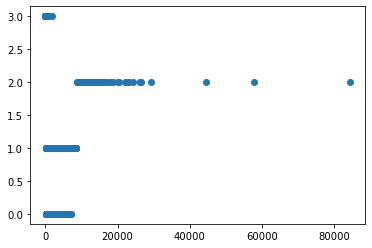

In [46]:
plt.scatter(X_val,y1,)

## Scatter Plot

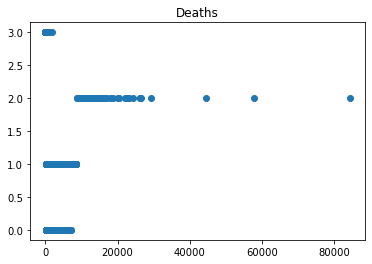

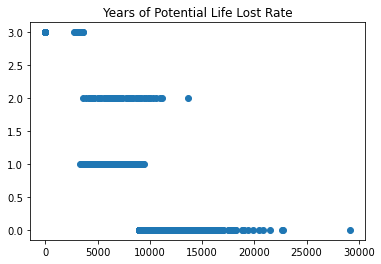

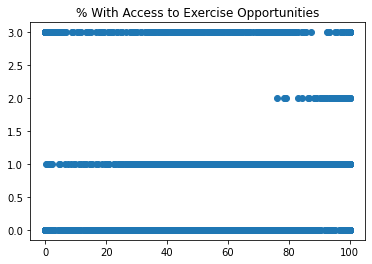

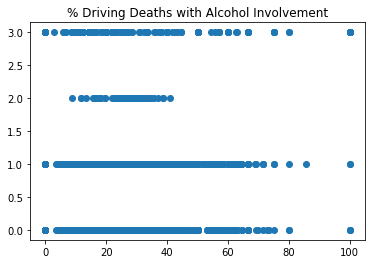

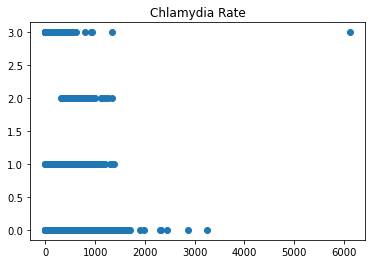

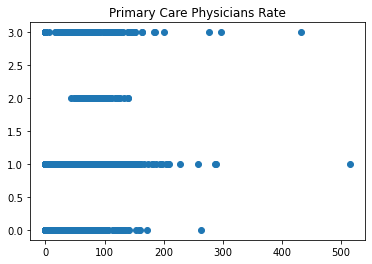

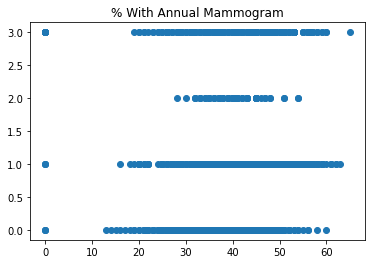

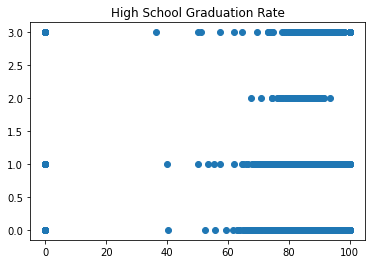

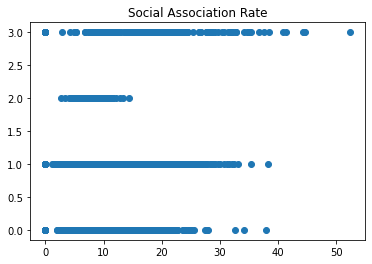

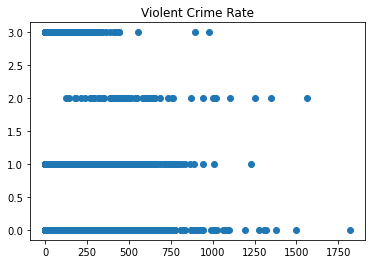

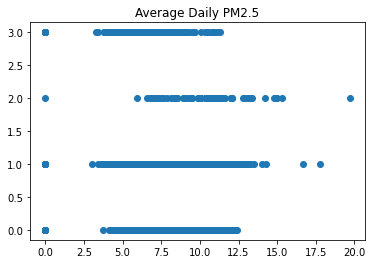

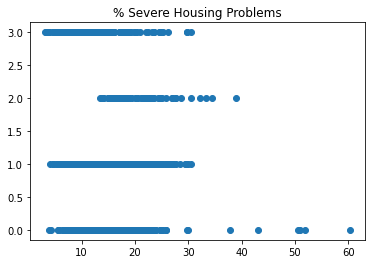

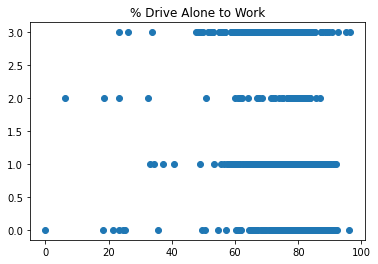

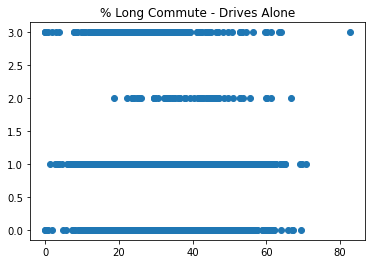

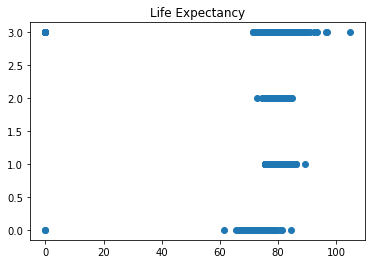

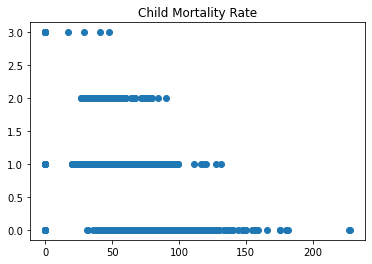

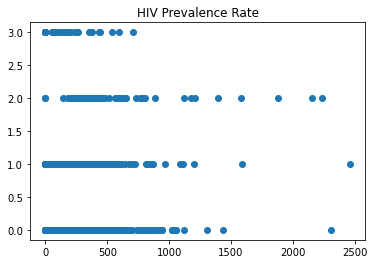

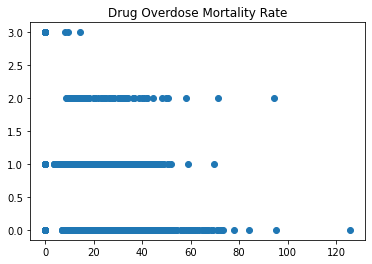

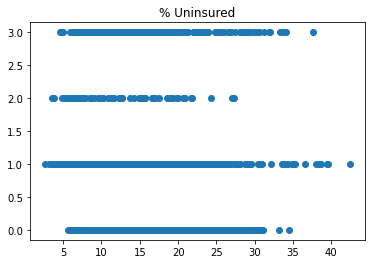

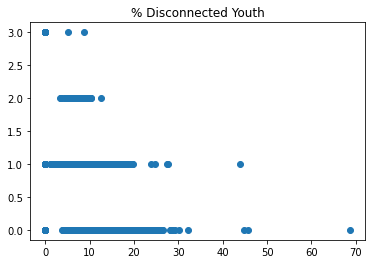

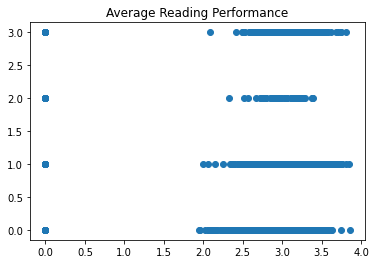

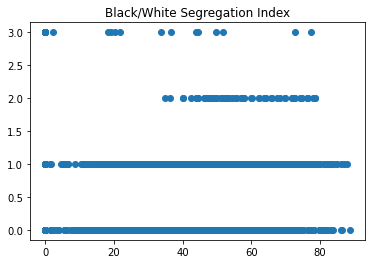

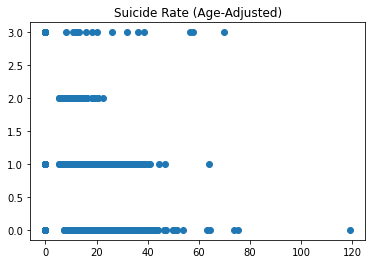

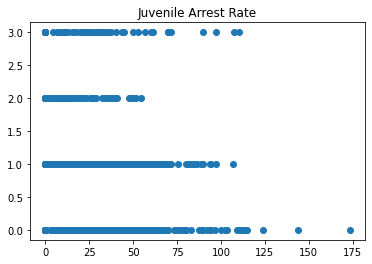

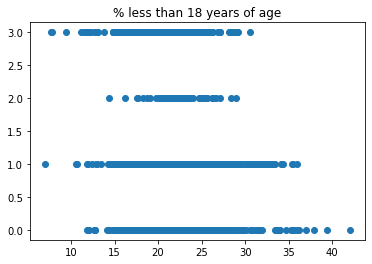

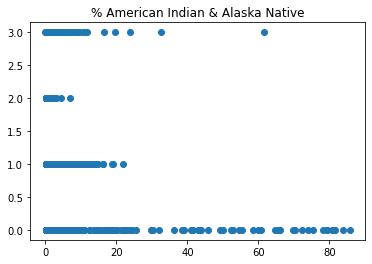

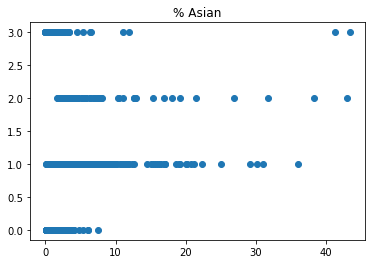

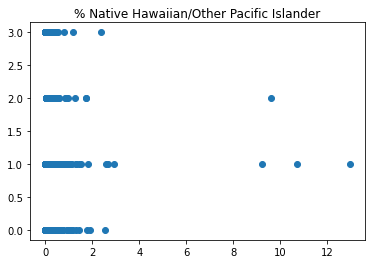

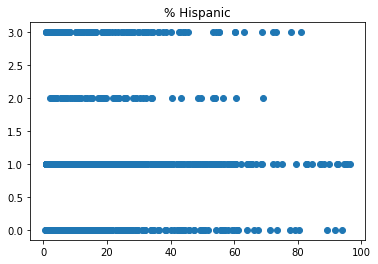

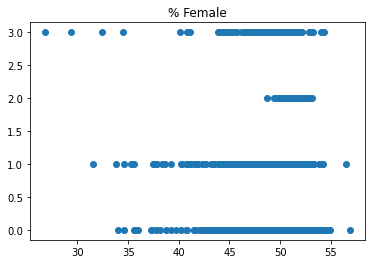

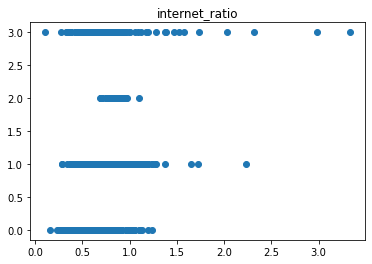

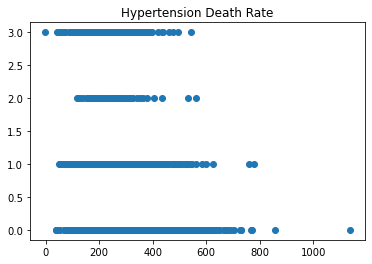

In [48]:
# to supress warnings
import warnings
warnings.simplefilter(action='ignore')

for i in X1.columns:
    plt.figure(frameon=True,)
    plt.scatter(X1[i],y1)
    plt.title(i)
#     plt.savefig(str(i)+".png")

## Violet plot

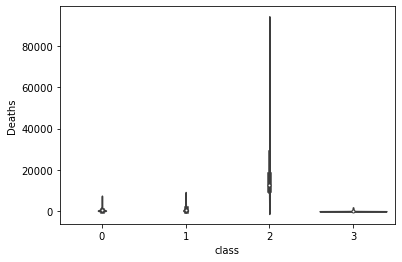

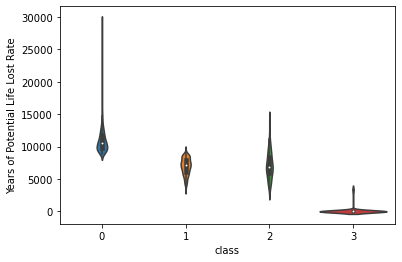

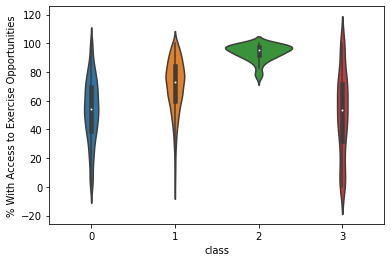

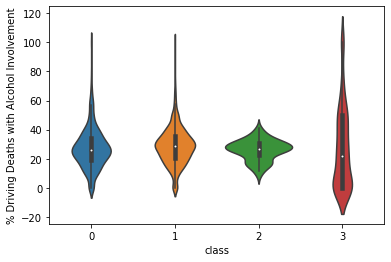

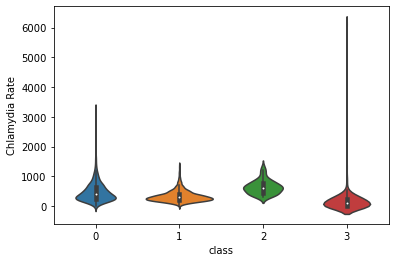

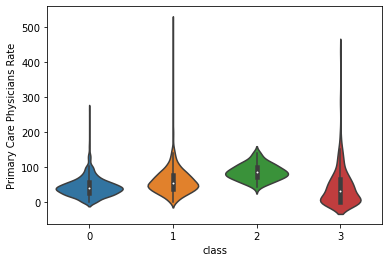

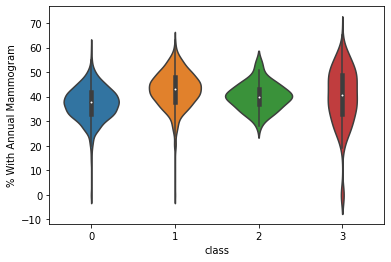

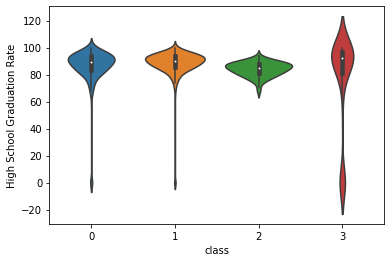

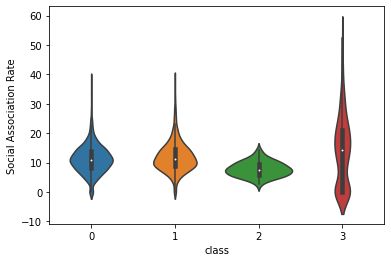

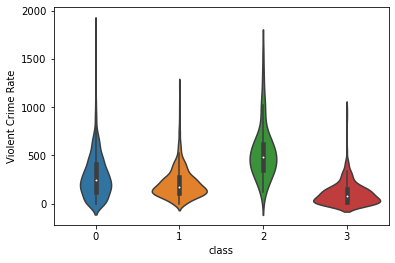

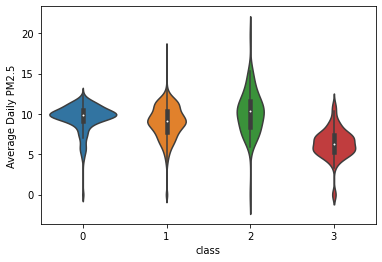

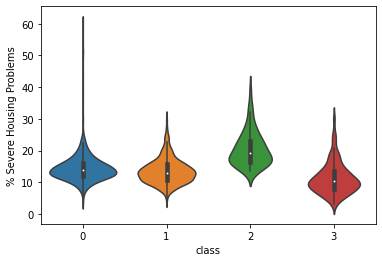

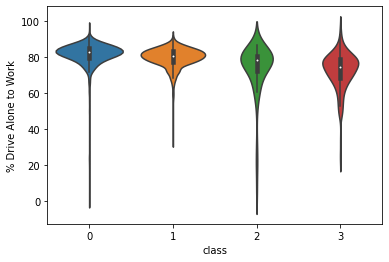

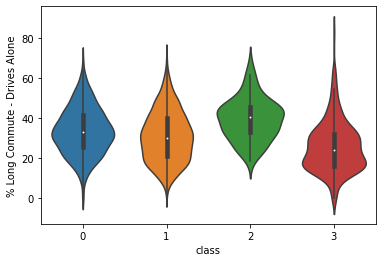

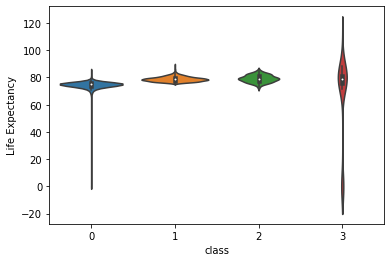

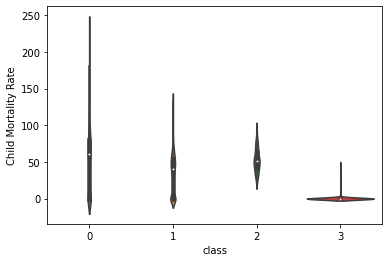

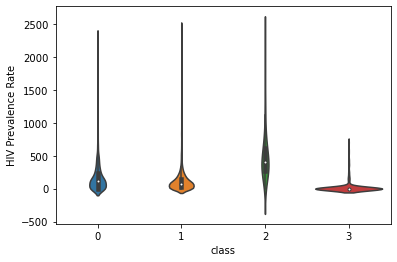

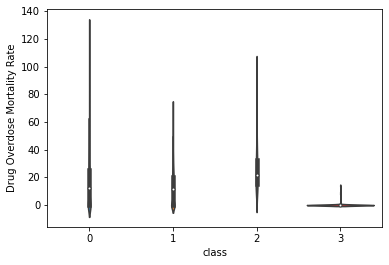

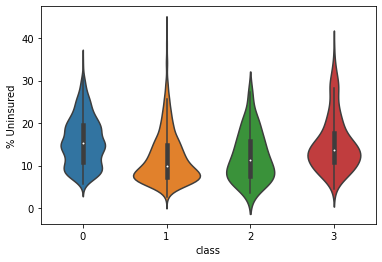

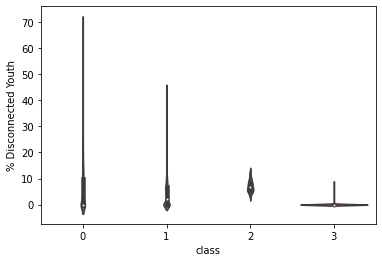

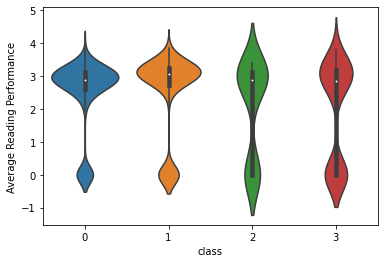

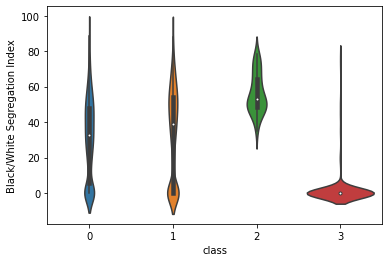

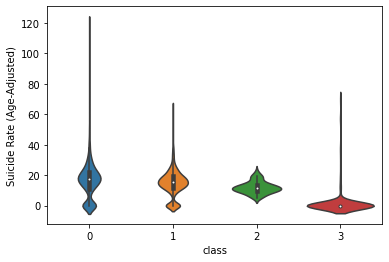

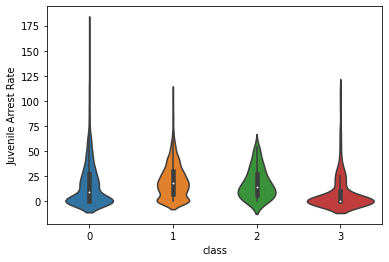

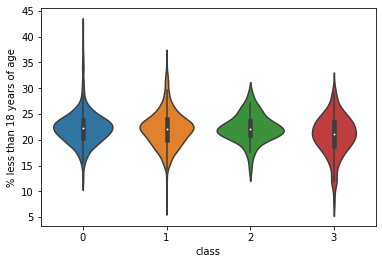

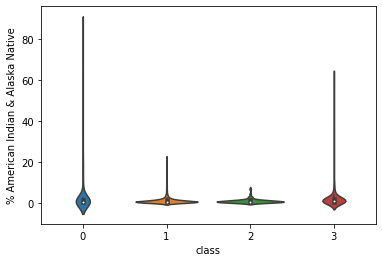

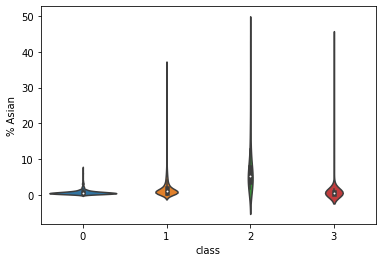

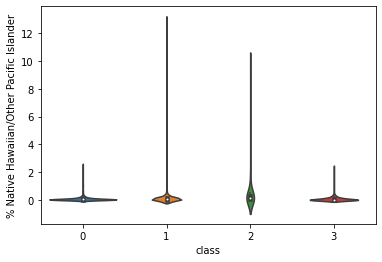

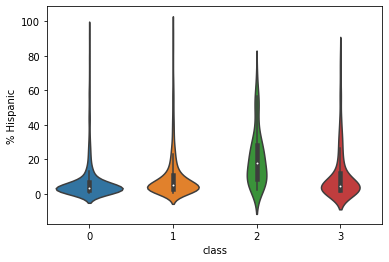

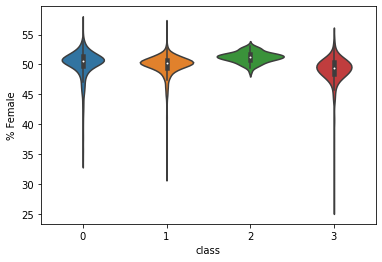

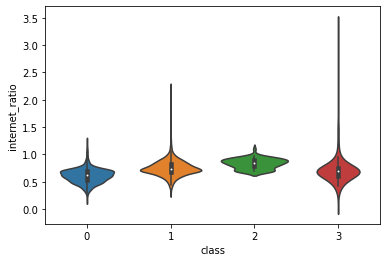

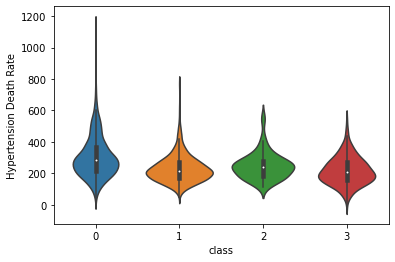

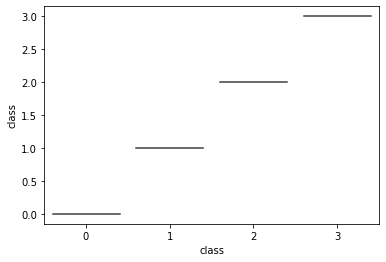

In [49]:
import seaborn as sns


for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x='class',y=X_red[i],data=X_red)
#     plt.savefig(str(i)+".png")

## Box Plot

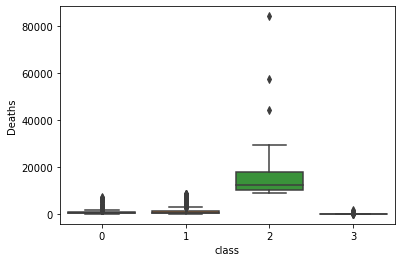

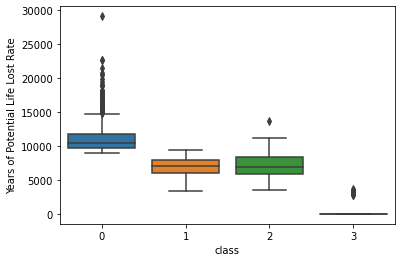

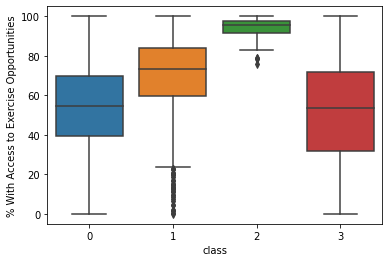

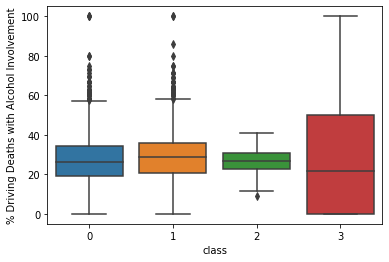

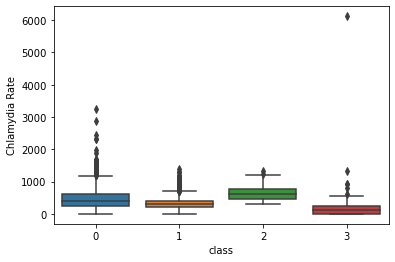

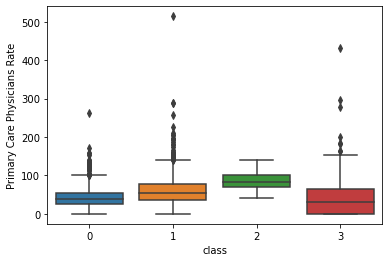

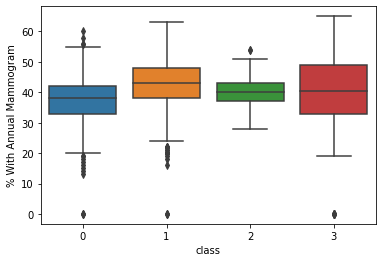

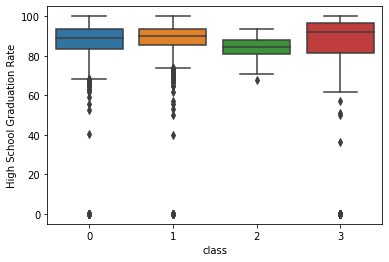

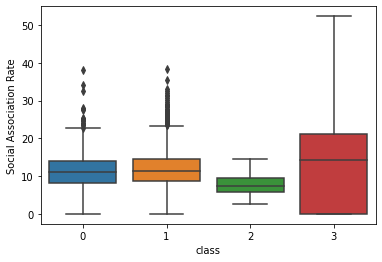

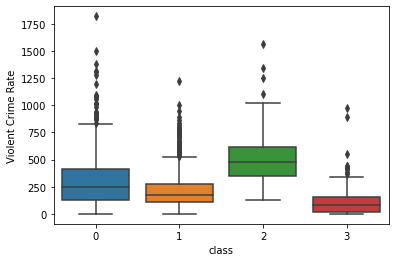

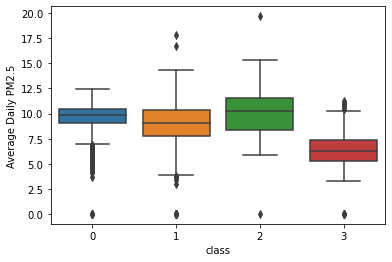

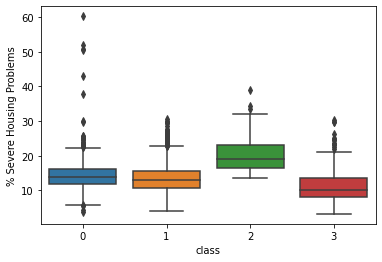

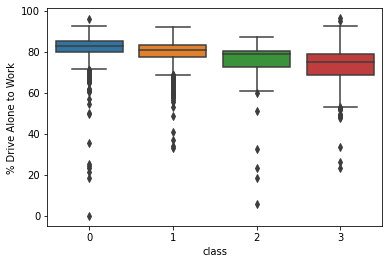

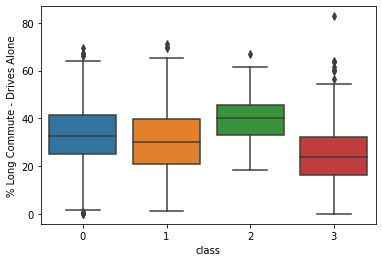

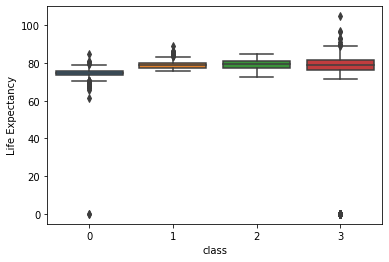

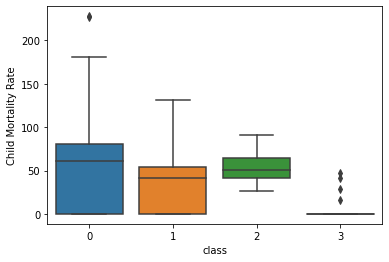

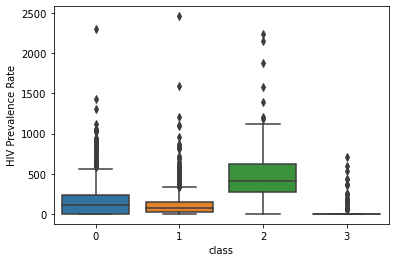

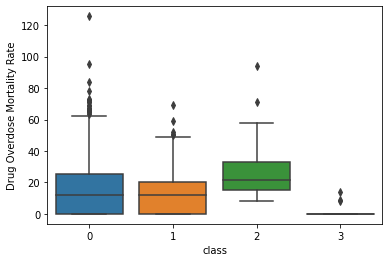

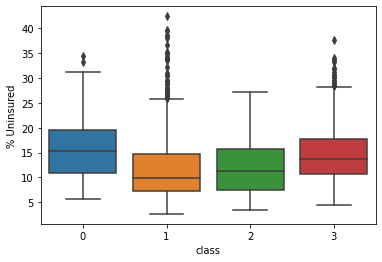

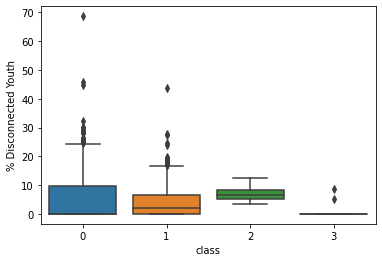

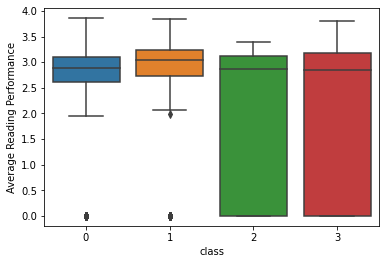

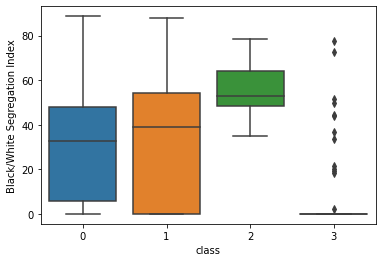

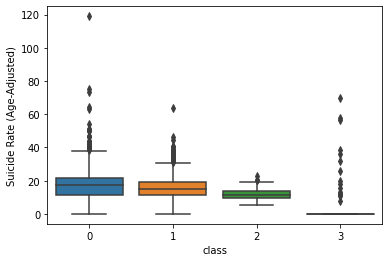

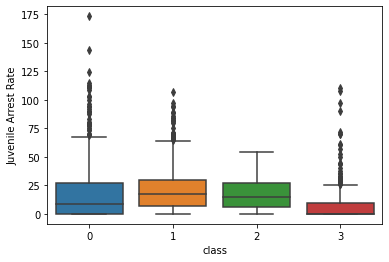

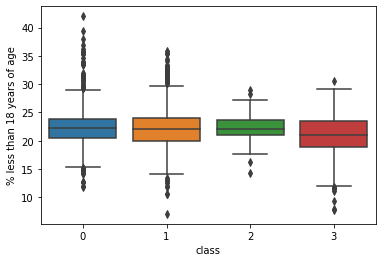

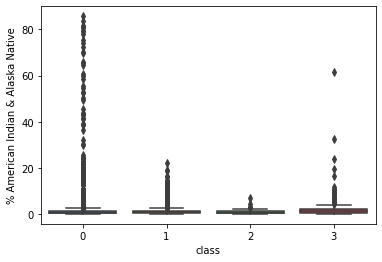

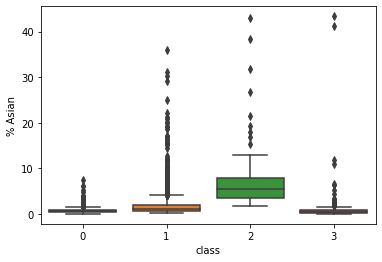

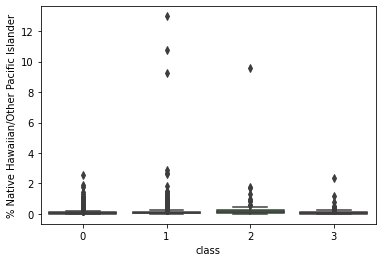

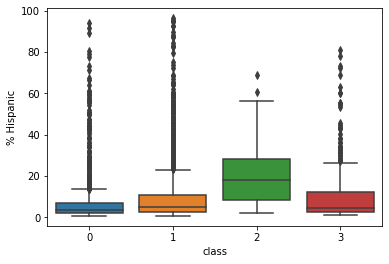

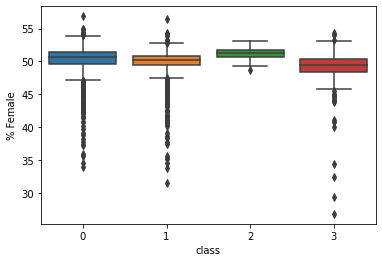

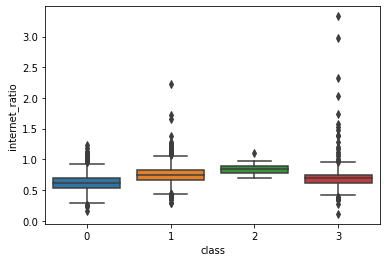

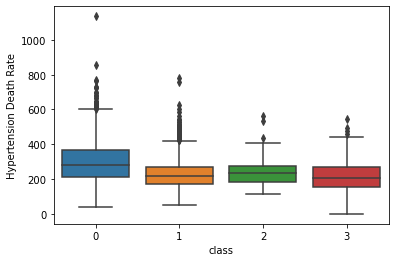

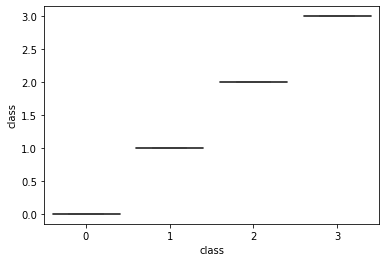

In [50]:
for i in X_red.columns:
    try:
        plt.figure(frameon=True,)
        sns.boxplot(x='class',y=X_red[i],data=X_red)
#         plt.savefig(str(i)+".png")
    except:
        pass

# Elbow method for number of clusters

Cluster 2 Inertia 47199465359.48201
Cluster 3 Inertia 31622076354.771194
Cluster 4 Inertia 21771556199.943165
Cluster 5 Inertia 14744821628.556484
Cluster 6 Inertia 11640986788.941378
Cluster 7 Inertia 8716677662.383457
Cluster 8 Inertia 7401398296.245372
Cluster 9 Inertia 6395281484.175753
Cluster 10 Inertia 5553601676.592009
Cluster 11 Inertia 4910718380.879467
Cluster 12 Inertia 4331419128.148833
Cluster 13 Inertia 3893344965.190705
Cluster 14 Inertia 3543490377.893099


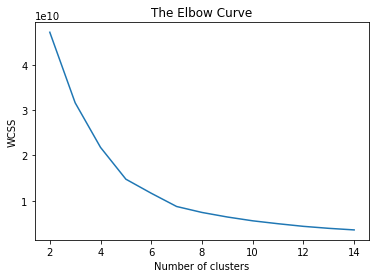

In [62]:
wcss = []  #Within-Cluster-Sum-of-Squares

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,15),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

Cluster 1 Inertia 67571857232.43335
Cluster 2 Inertia 47199465359.48202
Cluster 3 Inertia 31622076354.771194
Cluster 4 Inertia 21771556199.943165
Cluster 5 Inertia 14744821628.556484
Cluster 6 Inertia 11640986788.941378
Cluster 7 Inertia 8716677662.383457
Cluster 8 Inertia 7401398296.245372
Cluster 9 Inertia 6395281484.175753
Cluster 10 Inertia 5553601676.592009
Cluster 11 Inertia 4910718380.879467


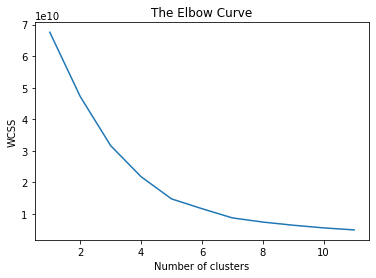

In [63]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [64]:
# 4 cluster seems a good choice

kmeans=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )

In [65]:
kmeans.fit(X)


KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

In [66]:
y_pred=kmeans.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# Silhoutte Score

In [67]:
X=X_red

No. Clusters: 2, Silhouette Score: 0.412, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.429, Change from Previous Cluster: 0.017
No. Clusters: 4, Silhouette Score: 0.48, Change from Previous Cluster: 0.051
No. Clusters: 5, Silhouette Score: 0.495, Change from Previous Cluster: 0.015
No. Clusters: 6, Silhouette Score: 0.508, Change from Previous Cluster: 0.013
No. Clusters: 7, Silhouette Score: 0.469, Change from Previous Cluster: -0.039
No. Clusters: 8, Silhouette Score: 0.426, Change from Previous Cluster: -0.043
No. Clusters: 9, Silhouette Score: 0.437, Change from Previous Cluster: 0.011
No. Clusters: 10, Silhouette Score: 0.421, Change from Previous Cluster: -0.016
No. Clusters: 11, Silhouette Score: 0.416, Change from Previous Cluster: -0.005
No. Clusters: 12, Silhouette Score: 0.429, Change from Previous Cluster: 0.013
No. Clusters: 13, Silhouette Score: 0.402, Change from Previous Cluster: -0.027
No. Clusters: 14, Silhouette Score: 0.412, Change from Pre

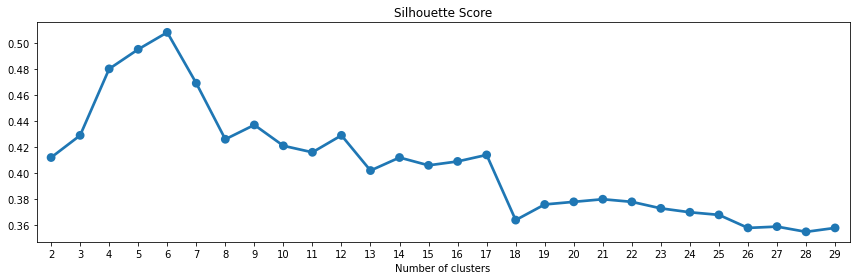

In [68]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=30
# Create a for loop to find optimal n_clusters
for n_clusters in range(2,30):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)

    silhouette_avg = round(silhouette_score(X, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

# Davies_bouldin_score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

### 4 or 6 seems good choice 

In [69]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,30):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=davies_bouldin_score(X, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 1.0531462886440501
Cluster 3 Davis Score 0.7984129419886039
Cluster 4 Davis Score 0.663959694531185
Cluster 5 Davis Score 0.5845415422536226
Cluster 6 Davis Score 0.5788352746247505
Cluster 7 Davis Score 0.6058517820722685
Cluster 8 Davis Score 0.646634421867291
Cluster 9 Davis Score 0.6444470295519111
Cluster 10 Davis Score 0.6685169318026871
Cluster 11 Davis Score 0.6274673183455225
Cluster 12 Davis Score 0.6587373027258915
Cluster 13 Davis Score 0.6841241595444031
Cluster 14 Davis Score 0.672230221599795
Cluster 15 Davis Score 0.6939788236659318
Cluster 16 Davis Score 0.7101775172228985
Cluster 17 Davis Score 0.714229190846954
Cluster 18 Davis Score 0.7300714159750172
Cluster 19 Davis Score 0.7260492283552444
Cluster 20 Davis Score 0.7597655692383025
Cluster 21 Davis Score 0.7107016677889783
Cluster 22 Davis Score 0.7358272172672283
Cluster 23 Davis Score 0.7365500920330786
Cluster 24 Davis Score 0.7620979007432901
Cluster 25 Davis Score 0.7506695473426981
Clus

# Calinski-Harabasz Index

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

The score is higher when clusters are dense and well separated.


In [70]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for i in range(2,30):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=metrics.calinski_harabasz_score(X, labels)
    print("Cluster", i, "Calinski index", score)

Cluster 2 Calinski index 1337.1735122753753
Cluster 3 Calinski index 1760.4274215746884
Cluster 4 Calinski index 2170.99366859467
Cluster 5 Calinski index 2772.162048666214
Cluster 6 Calinski index 2973.136034539026
Cluster 7 Calinski index 3480.668253478815
Cluster 8 Calinski index 3590.970753985144
Cluster 9 Calinski index 3696.021748725166
Cluster 10 Calinski index 3834.083279475761
Cluster 11 Calinski index 3941.5983910171763
Cluster 12 Calinski index 4098.762385070758
Cluster 13 Calinski index 4207.539702172246
Cluster 14 Calinski index 4289.3722343073905
Cluster 15 Calinski index 4314.564596095327
Cluster 16 Calinski index 4375.333324538523
Cluster 17 Calinski index 4398.461272887604
Cluster 18 Calinski index 4424.7213796521855
Cluster 19 Calinski index 4402.325350643667
Cluster 20 Calinski index 4375.353115540254
Cluster 21 Calinski index 4360.092152282962
Cluster 22 Calinski index 4383.237334249712
Cluster 23 Calinski index 4349.692920809801
Cluster 24 Calinski index 4348.41514